In [1]:
import tensorflow as tf

from tensorflow import keras


2025-01-04 19:22:53.370701: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-04 19:22:53.387236: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-04 19:22:53.392024: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-04 19:22:53.404327: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Now showing the image at the dataset's index value o 

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

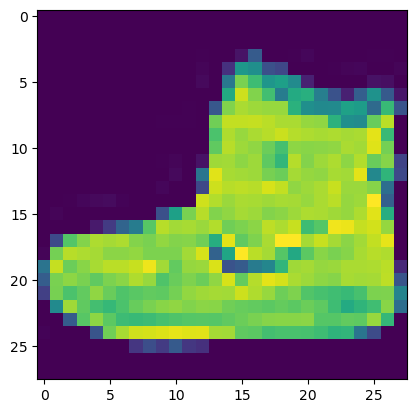

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

# Now Normalizing the values from 0-255 to 0 and 1 as NNs work batter with binary inputs 

In [12]:
training_images = training_images / 255.0

test_images = test_images / 255.0

# Now the model get's defined according to use by mentioning it's layer

In [13]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [14]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 0.9999999999999999
class with highest probability: 2


In [15]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5


W0000 00:00:1736019166.825757   51022 gpu_backend_lib.cc:631] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2025-01-04 19:32:46.830624: W tensorflow/core/framework/op_kernel.cc:1840] OP_REQUIRES failed at xla_ops.cc:577 : INTERNAL: libdevice not found at ./libdevice.10.bc


InternalError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/runpy.py", line 197, in _run_module_as_main

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/runpy.py", line 87, in _run_code

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/asyncio/base_events.py", line 601, in run_forever

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/asyncio/events.py", line 80, in _run

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code

  File "/tmp/ipykernel_50827/3187597755.py", line 5, in <module>

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/keras/src/backend/tensorflow/trainer.py", line 368, in fit

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/keras/src/backend/tensorflow/trainer.py", line 216, in function

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/keras/src/backend/tensorflow/trainer.py", line 129, in multi_step_on_iterator

libdevice not found at ./libdevice.10.bc
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_3246]

In [16]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

W0000 00:00:1736019169.718138   51022 gpu_backend_lib.cc:631] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2025-01-04 19:32:49.722710: W tensorflow/core/framework/op_kernel.cc:1840] OP_REQUIRES failed at xla_ops.cc:577 : INTERNAL: libdevice not found at ./libdevice.10.bc


InternalError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/runpy.py", line 197, in _run_module_as_main

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/runpy.py", line 87, in _run_code

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/asyncio/base_events.py", line 601, in run_forever

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/asyncio/events.py", line 80, in _run

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code

  File "/tmp/ipykernel_50827/2734122326.py", line 2, in <module>

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/keras/src/backend/tensorflow/trainer.py", line 481, in evaluate

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/keras/src/backend/tensorflow/trainer.py", line 216, in function

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/keras/src/backend/tensorflow/trainer.py", line 129, in multi_step_on_iterator

libdevice not found at ./libdevice.10.bc
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_3427]

In [9]:
classifications = model.predict(test_images)

print(classifications[0])

W0000 00:00:1736018610.300582   51020 gpu_backend_lib.cc:631] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2025-01-04 19:23:30.301700: W tensorflow/core/framework/op_kernel.cc:1840] OP_REQUIRES failed at xla_ops.cc:577 : INTERNAL: libdevice not found at ./libdevice.10.bc
2025-01-04 19:23:30.301799: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INTERNAL: libdevice not found at ./libdevice.10.bc
	 [[{{node StatefulPartitionedCall}}]]


InternalError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/runpy.py", line 197, in _run_module_as_main

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/runpy.py", line 87, in _run_code

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/asyncio/base_events.py", line 601, in run_forever

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/asyncio/events.py", line 80, in _run

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code

  File "/tmp/ipykernel_50827/1814142862.py", line 1, in <module>

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/keras/src/backend/tensorflow/trainer.py", line 559, in predict

  File "/home/zero/miniconda3/envs/tf_gpu/lib/python3.9/site-packages/keras/src/backend/tensorflow/trainer.py", line 256, in one_step_on_data_distributed

libdevice not found at ./libdevice.10.bc
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_data_distributed_2205]

In [17]:
print(test_labels[0])

9
